<a href="https://colab.research.google.com/github/mmdrahmani/python-for-neuroscience/blob/main/tutorial_01_sine_fit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#import libraries

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

# define x and y variables

In [32]:
N =629
x = np.linspace(0, np.pi*2, N)
y = np.sin(x)
y.shape

(629,)

# plot y against x
using matplotlib.pyplot

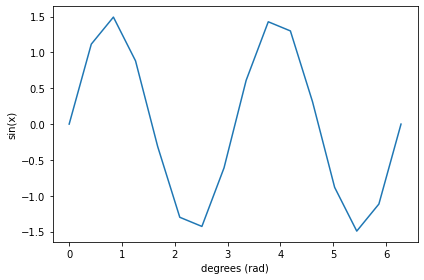

In [74]:
plt.plot(x,y)
plt.xlabel('degrees (rad)')
plt.ylabel('sin(x)')
plt.tight_layout()

# generate noisy sinusoidal data and plot
parameters of sine wave:
- amplitude: a
- period: T
- angular frequency: omega: w : 2*pi*f: 2*pi/T
- phase: phi
- offset: c
- freq: f : 1/T : w/2*pi

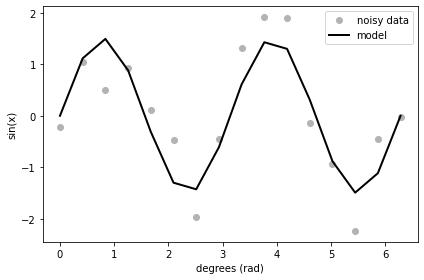

In [62]:
N, amp, omega, phase, offset, noise = 16, 1.5, 2, 0, 0, 2
x = np.linspace(0, np.pi*2, N)
y = amp * np.sin(omega*x + phase) + offset
y_noise = y + noise*(np.random.random(len(x))-0.5)

plt.plot(x,y_noise, marker='o', color=(.7,.7,.7), linestyle='',label='noisy data')
plt.plot(x,y,'k',label='model',linewidth=2)
plt.xlabel('degrees (rad)')
plt.ylabel('sin(x)')
plt.legend(loc='best')
plt.tight_layout()

# define a function to fit sinusoidal data
### fitting: estimating parameters of sine function

In [78]:
def func_fit_sine(x, y):
    '''
    x and y are numpy arrays
    Fit sin to the input sequence, and return fitting parameters:
    parameters of sine wave:
    - amplitude: a
    - period: T
    - angular frequency: omega: w : 2*pi*f: 2*pi/T
    - phase: phi
    - offset: c
    - freq: f : 1/T : w/2*pi
    '''

    # intialize sine wave parameters for the curve_fit 
    # the parameters are initiall estimated using fft
    # then they are used in curve_fit to estimate optimal parameters
    
    ff = np.fft.fftfreq(len(x), (x[1]-x[0])) # assume uniform spacing
    f_real = abs(np.fft.fft(y))
    estimated_f = abs(ff[np.argmax(f_real[1:])+1]) # excluding the zero frequency "peak", which is related to offset
    estimated_a = np.std(y) * 2.**0.5
    estimated_o = np.mean(y)
    init_params = np.array([estimated_a, 2.*np.pi*estimated_f, 0., estimated_o])
    
    # define a full sine function used for fitting
    # f(x) = A * sin(w*x + phi) + c
    def func_sine(x, A, w, phi, c):  return A * np.sin(w*x + phi) + c

    # fit using scipy
    param_optimal, param_covar = scipy.optimize.curve_fit(func_sine, x, y, p0=init_params) # p0 initial parameters
    
    # extract fitted parameters
    A, w, phi, c = param_optimal
    f = w/(2.*np.pi)

    # function
    fit_func = lambda x: A * np.sin(w*x + phi) + c
    
    # the output of the function
    return {"a": A, "w": w, "phi": phi, "c": c, "f": f, "T": 1./f, "max_cov": np.max(param_covar),
            "fit":fit_func, "all_results": (init_params,param_optimal,param_covar)}

# fit the sinusoidal data using fit function

In [76]:
res = func_fit_sine(x, y_noise)

print( '''Predicted Parameters:\n
      Amplitude = %(a)s
      Angular f = %(w)s
      phase     = %(phi)s
      offset    = %(c)s
      Max. Cov. = %(max_cov)s'''%res )

Predicted Parameters:

      Amplitude = 1.5420170870718957
      Angular f = 2.0734318374478105
      phase     = -0.22631678832931287
      offset    = 0.053067516230859986
      Max. Cov. = 0.05439996904873399


In [77]:
res['all_results']

(array([1.64138335, 1.875     , 0.        , 0.05368603]),
 array([ 1.54201709,  2.07343184, -0.22631679,  0.05306752]),
 array([[ 4.57805397e-02,  3.28873557e-04, -1.05070102e-03,
         -1.67472233e-05],
        [ 3.28873557e-04,  3.82274208e-03, -1.20102329e-02,
         -9.10477147e-06],
        [-1.05070102e-03, -1.20102329e-02,  5.43999690e-02,
         -2.32699153e-03],
        [-1.67472233e-05, -9.10477147e-06, -2.32699153e-03,
          2.13902636e-02]]))

# plot the fit function alongside the data and the groundtruth model

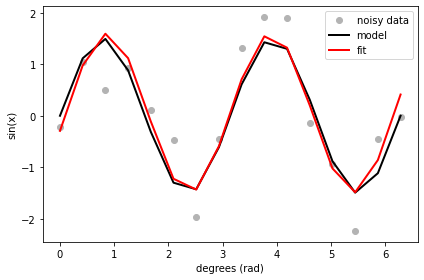

In [72]:
plt.plot(x,y_noise, marker='o', color=(.7,.7,.7), linestyle='',label='noisy data')
plt.plot(x,y,'k',label='model',linewidth=2)
plt.xlabel('degrees (rad)')
plt.ylabel('sin(x)')
plt.tight_layout()

# plot the fitted model
plt.plot(x, res['fit'](x), 'r-', label='fit',linewidth=2)
plt.legend(loc='best')